In [34]:
import numpy as np
import pandas as pd
from os import path
import os
import scipy.stats as stats
import collections
import DataLoaderHistoric as DLH
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = [16, 16]

Load the dataframes

In [2]:
path_processed = '/home/john/Documents/projects/fpl-analytics-and-prediction/Processed'
filename_player_database = 'player_database.csv'
filename_player_metadata = 'player_metadata.csv'
filename_team_metadata = 'team_metadata.csv'

player_data = pd.read_csv(path.join(path_processed, filename_player_database))
team_data = pd.read_csv(path.join(path_processed, 'team_stats.csv'))

In [3]:
player_data.head()

,unique_id,season,name,assists,bonus,bps,clean_sheets,creativity,element,element_type,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position,team_unique_id,team_id,team_name,team_points,team_wins,team_draws,team_losses,team_goals_for,team_goals_against,team_goals_diff,team_played,team_yc,team_rc,team_position,next_fixture_team,next_fixture_position,next_fixture_points,next_fixture_wins,next_fixture_draws,next_fixture_losses,next_fixture_goals_for,next_fixture_goals_against,next_fixture_goals_diff,next_fixture_played,next_fixture_yc,next_fixture_rc,total_assists_any_all,total_bonus_any_all,total_bps_any_all,total_clean_sheets_any_all,total_creativity_any_all,total_goals_conceded_any_all,total_goals_scored_any_all,total_ict_index_any_all,total_influence_any_all,total_minutes_any_all,total_own_goals_any_all,total_penalties_missed_any_all,total_penalties_saved_any_all,total_red_cards_any_all,total_saves_any_all,total_selected_any_all,total_threat_any_all,total_total_points_any_all,total_transfers_balance_any_all,total_value_any_all,total_yellow_cards_any_all,total_assists_home_all,total_bonus_home_all,total_bps_home_all,total_clean_sheets_home_all,total_creativity_home_all,total_goals_conceded_home_all,total_goals_scored_home_all,total_ict_index_home_all,total_influence_home_all,total_minutes_home_all,total_own_goals_home_all,total_penalties_missed_home_all,total_penalties_saved_home_all,total_red_cards_home_all,total_saves_home_all,total_selected_home_all,total_threat_home_all,total_total_points_home_all,total_transfers_balance_home_all,total_value_home_all,total_yellow_cards_home_all,total_assists_away_all,total_bonus_away_all,total_bps_away_all,total_clean_sheets_away_all,total_creativity_away_all,total_goals_conceded_away_all,total_goals_scored_away_all,total_ict_index_away_all,total_influence_away_all,total_minutes_away_all,total_own_goals_away_all,total_penalties_missed_away_all,total_penalties_saved_away_all,total_red_cards_away_all,total_saves_away_all,total_selected_away_all,total_threat_away_all,total_total_points_away_all,total_transfers_balance_away_all,total_value_away_all,total_yellow_cards_away_all,mean_assists_any_all,median_assists_any_all,std_assists_any_all,se_assists_any_all,range_assists_any_all,mean_bonus_any_all,median_bonus_any_all,std_bonus_any_all,se_bonus_any_all,range_bonus_any_all,mean_bps_any_all,median_bps_any_all,std_bps_any_all,se_bps_any_all,range_bps_any_all,mean_clean_sheets_any_all,median_clean_sheets_any_all,std_clean_sheets_any_all,se_clean_sheets_any_all,range_clean_sheets_any_all,mean_creativity_any_all,median_creativity_any_all,std_creativity_any_all,se_creativity_any_all,range_creativity_any_all,mean_goals_conceded_any_all,median_goals_conceded_any_all,std_goals_conceded_any_all,se_goals_conceded_any_all,range_goals_conceded_any_all,mean_goals_scored_any_all,median_goals_scored_any_all,std_goals_scored_any_all,se_goals_scored_any_all,range_goals_scored_any_all,mean_ict_index_any_all,median_ict_index_any_all,std_ict_index_any_all,se_ict_index_any_all,range_ict_index_any_all,mean_influence_any_all,median_influence_any_all,std_influence_any_all,se_influence_any_all,range_influence_any_all,mean_minutes_any_all,median_minutes_any_all,std_minutes_any_all,se_minutes_any_all,range_minutes_any_all,mean_own_goals_any_all,median_own_goals_any_all,std_own_goals_any_all,se_own_goals_any_all,range_own_goals_any_all,mean_penalties_missed_any_all,median_penalties_missed_any_all,std_penalties_missed_any_all,se_penalties_missed_any_all,range_penalties_missed_any_all,mean_penalties_saved_any_all,median_penalties_saved_any_all,std_penalties_saved_any_all,se_penalties_saved_any_all,range_penalties_saved_any_all,mean_red_cards_any_all,median_red_cards_any_all,std_red_cards_any_all,se_red_ca

In [4]:
team_data.head()

,team_name,team_id,season,team_unique_id,round,position,team_id_against,team_unique_id_against,against_position,win,draw,loss,team_score,team_concede,total_wins,total_draws,total_losses,was_home,against_team_name,team_results_all,team_results_home,team_results_away,team_score_all,team_score_home,team_score_away,team_concede_all,team_concede_home,team_concede_away,team_prob_win_all_3,team_prob_win_home_3,team_prob_win_away_3,team_prob_draw_all_3,team_prob_draw_home_3,team_prob_draw_away_3,team_prob_loss_all_3,team_prob_loss_home_3,team_prob_loss_away_3,team_prob_win_all_4,team_prob_win_home_4,team_prob_win_away_4,team_prob_draw_all_4,team_prob_draw_home_4,team_prob_draw_away_4,team_prob_loss_all_4,team_prob_loss_home_4,team_prob_loss_away_4,team_prob_win_all_5,team_prob_win_home_5,team_prob_win_away_5,team_prob_draw_all_5,team_prob_draw_home_5,team_prob_draw_away_5,team_prob_loss_all_5,team_prob_loss_home_5,team_prob_loss_away_5,team_prob_win_all_10,team_prob_win_home_10,team_prob_win_away_10,team_prob_draw_all_10,team_prob_draw_home_10,team_prob_draw_away_10,team_prob_loss_all_10,team_prob_loss_home_10,team_prob_loss_away_10,team_prob_score_all_3,team_prob_score_home_3,team_prob_score_away_3,team_prob_score2_all_3,team_prob_score2_home_3,team_prob_score2_away_3,team_prob_score3_all_3,team_prob_score3_home_3,team_prob_score3_away_3,team_prob_concede_all_3,team_prob_concede_home_3,team_prob_concede_away_3,team_prob_concede2_all_3,team_prob_concede2_home_3,team_prob_concede2_away_3,team_prob_concede3_all_3,team_prob_concede3_home_3,team_prob_concede3_away_3,team_prob_score_all_4,team_prob_score_home_4,team_prob_score_away_4,team_prob_score2_all_4,team_prob_score2_home_4,team_prob_score2_away_4,team_prob_score3_all_4,team_prob_score3_home_4,team_prob_score3_away_4,team_prob_concede_all_4,team_prob_concede_home_4,team_prob_concede_away_4,team_prob_concede2_all_4,team_prob_concede2_home_4,team_prob_concede2_away_4,team_prob_concede3_all_4,team_prob_concede3_home_4,team_prob_concede3_away_4,team_prob_score_all_5,team_prob_score_home_5,team_prob_score_away_5,team_prob_score2_all_5,team_prob_score2_home_5,team_prob_score2_away_5,team_prob_score3_all_5,team_prob_score3_home_5,team_prob_score3_away_5,team_prob_concede_all_5,team_prob_concede_home_5,team_prob_concede_away_5,team_prob_concede2_all_5,team_prob_concede2_home_5,team_prob_concede2_away_5,team_prob_concede3_all_5,team_prob_concede3_home_5,team_prob_concede3_away_5,team_prob_score_all_10,team_prob_score_home_10,team_prob_score_away_10,team_prob_score2_all_10,team_prob_score2_home_10,team_prob_score2_away_10,team_prob_score3_all_10,team_prob_score3_home_10,team_prob_score3_away_10,team_prob_concede_all_10,team_prob_concede_home_10,team_prob_concede_away_10,team_prob_concede2_all_10,team_prob_concede2_home_10,team_prob_concede2_away_10,team_prob_concede3_all_10,team_prob_concede3_home_10,team_prob_concede3_away_10,odds_win_3,odds_draw_3,odds_loss_3,odds_win_4,odds_draw_4,odds_loss_4,odds_win_5,odds_draw_5,odds_loss_5,odds_win_10,odds_draw_10,odds_loss_10
0,Burnley,3,2016,3,1,18,16,16,6,0,0,1,0,1,0,0,1,True,Swansea,[0],[0],[],[0],[0],[],[1],[1],[],0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,Swansea,16,2016,16,1,6,3,3,18,1,0,0,1,0,1,0,0,False,Burnley,[2],[],[2],[1],[],[1],[0],[],[0],0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5

In [14]:
data_final = player_data.merge(team_data, on=['team_unique_id', 'season', 'team_id', 'round', 'was_home', 'team_name', 'position'])
data_final = data_final.sort_values(by=['unique_id', 'round'])
data_final['win_next'] = 0
data_final['draw_next'] = 0
data_final['loss_next'] = 0
data_final['total_points_next'] = 0

for i in range(data_final.shape[0]-1):
    round_diff = data_final['round'].iloc[i+1] - data_final['round'].iloc[i]
    if round_diff >= 0:
        data_final['win_next'].iloc[i] = data_final['win'].iloc[i+1]
        data_final['draw_next'].iloc[i] = data_final['draw'].iloc[i+1]
        data_final['loss_next'].iloc[i] = data_final['loss'].iloc[i+1]
        data_final['total_points_next'].iloc[i] = data_final['total_points'].iloc[i+1]
    else:
        data_final['win_next'].iloc[i] = -1
        data_final['draw_next'].iloc[i] = -1
        data_final['loss_next'].iloc[i] = -1

data_final = data_final[data_final['win_next']!=-1]
data_final

/home/john/anaconda3/envs/data_science/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


unique_id  season               name  assists  bonus  bps  \
0              1    2016    Aaron_Cresswell        0      0    0   
22             1    2016    Aaron_Cresswell        0      0    0   
47             1    2016    Aaron_Cresswell        0      0    0   
73             1    2016    Aaron_Cresswell        0      0    0   
101            1    2016    Aaron_Cresswell        0      0    0   
...          ...     ...                ...      ...    ...  ...   
89009       3221    2020  Leighton_Clarkson        0      0    0   
89746       3222    2020    Elliot_Anderson        0      0    0   
89346       3223    2020         Kean_Bryan        0      0   13   
89373       3223    2020         Kean_Bryan        0      0    9   
91464       3224    2020          Lee_Grant        0      0    0   

       clean_sheets  creativity  element  element_type  fixture  \
0                 0         0.0      454             2       10   
22                0         0.0      454             2       20   
47                0         0.0      454             2       29   
73                0         0.0      454             2       38   
101               0         0.0      454             2       46   
...             ...         ...      ...           ...      ...   
89009             0         0.0      601             3       90   
89746             0         0.0      602             3       92   
89346             0        14.9      603             2       97   
89373             0         0.3      603             2      105   
91464             0         0.0      604             1      108   

       goals_conceded  goals_scored  ict_index  influence  \
0                   0             0        0.0        0.0   
22                  0             0        0.0        0.0   
47                  0             0        0.0        0.0   
73                  0             0        0.0        0.0   
101                 0             0        0.0        0.0   
...               ...           ...        ...        ...   
89009               0             0        0.0        0.0   
89746               0             0        0.0        0.0   
89346               1             0        2.8       13.0   
89373               2             0        1.7       12.8   
91464               0             0        0.0        0.0   

               kickoff_time  minutes  own_goals  penalties_missed  \
0      2016-08-15T19:00:00Z        0          0                 0   
22     2016-08-21T15:00:00Z        0          0                 0   
47     2016-08-28T15:00:00Z        0          0                 0   
73     2016-09-10T14:00:00Z        0          0                 0   
101    2016-09-17T14:00:00Z        0          0                 0   
...                     ...      ...        ...               ...   
89009  2020-11-28T12:30:00Z        0          0                 0   
89746  2020-11-27T20:00:00Z        0          0                 0   
89346  2020-11-28T20:00:00Z       62          0                 0   
89373  2020-12-06T14:15:00Z       90          0                 0   
91464  2020-12-05T17:30:00Z        0          0                 0   

       penalties_saved  red_cards  round  saves  selected  team_a_score  \
0                    0          0      1      0     14023           1.0   
22                   0          0      2      0     11531           0.0   
47                   0          0      3      0      9587           1.0   
73                   0          0      4      0      8427           4.0   
101                  0          0      5      0      7933           2.0   
...                ...        ...    ...    ...       ...           ...   
89009                0          0     10      0        69           1.0   
89746                0          0     10      0         0           2.0   
89346                0          0     10      0         0           0.0   
89373                0          0     11      0     11938           2.0  

<AxesSubplot:>

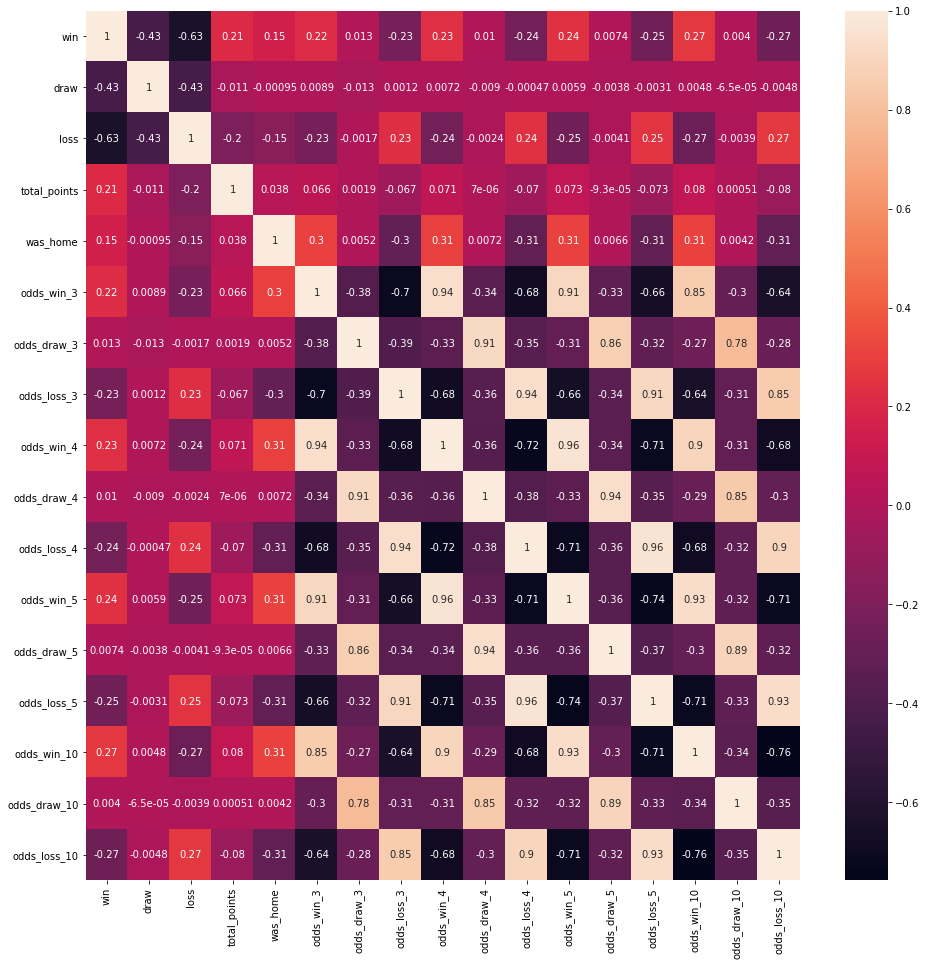

In [6]:
# team_data_sub = team_data[['win', 'draw', 'loss', 'was_home', 'team_prob_win_all_3', 'team_prob_draw_all_3', 'team_prob_loss_all_3', 'team_prob_win_all_4', 'team_prob_draw_all_4', 'team_prob_loss_all_4', 'team_prob_win_all_5', 'team_prob_draw_all_5', 'team_prob_loss_all_5', 'team_prob_win_all_10', 'team_prob_draw_all_10', 'team_prob_loss_all_10']]
# team_data_sub = team_data[['win', 'draw', 'loss', 'was_home', 'team_prob_win_home_3', 'team_prob_draw_home_3', 'team_prob_loss_home_3', 'team_prob_win_home_4', 'team_prob_draw_home_4', 'team_prob_loss_home_4', 'team_prob_win_home_5', 'team_prob_draw_home_5', 'team_prob_loss_home_5', 'team_prob_win_home_10', 'team_prob_draw_home_10', 'team_prob_loss_home_10']]
team_data_sub = data_final[['win_next', 'draw_next', 'loss_next', 'was_home', 'team_prob_win_all_3', 'team_prob_draw_all_3', 'team_prob_loss_all_3', 'team_prob_win_all_4', 'team_prob_draw_all_4', 'team_prob_loss_all_4', 'team_prob_win_all_5', 'team_prob_draw_all_5', 'team_prob_loss_all_5', 'team_prob_win_all_10', 'team_prob_draw_all_10', 'team_prob_loss_all_10']]

# team_data_sub = team_data_sub[team_data_sub['was_home']==True]

team_data_sub = data_final[['win', 'draw', 'loss', 'total_points', 'was_home','odds_win_3', 'odds_draw_3', 'odds_loss_3', 'odds_win_4', 'odds_draw_4', 'odds_loss_4', 'odds_win_5', 'odds_draw_5', 'odds_loss_5', 'odds_win_10', 'odds_draw_10', 'odds_loss_10']]


team_data_corr = team_data_sub.corr()
sns.heatmap(team_data_corr, annot=True)



In [77]:
data_filt = data_final[data_final['element_type']==4]
data_filt = data_filt[data_filt['minutes']>0]

Calculate the pearsons correlation coefficient

In [78]:
columns = data_filt.columns
target_column = 'total_points_next'

final_columns = []
final_corr = []

for column in columns:
    if data_filt[column].dtype != 'object':
        final_columns.append(column)
        final_corr.append(pearsonr(data_filt[target_column], data_filt[column])[0])


/home/john/anaconda3/envs/data_science/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [79]:
data_corr_dict = {'labels': final_columns, 'correlation_coeff': final_corr}

data_corr = pd.DataFrame(data_corr_dict)
data_corr['correlation_coeff'] = data_corr['correlation_coeff'].abs()
data_corr = data_corr.sort_values(by='correlation_coeff', ascending=False)

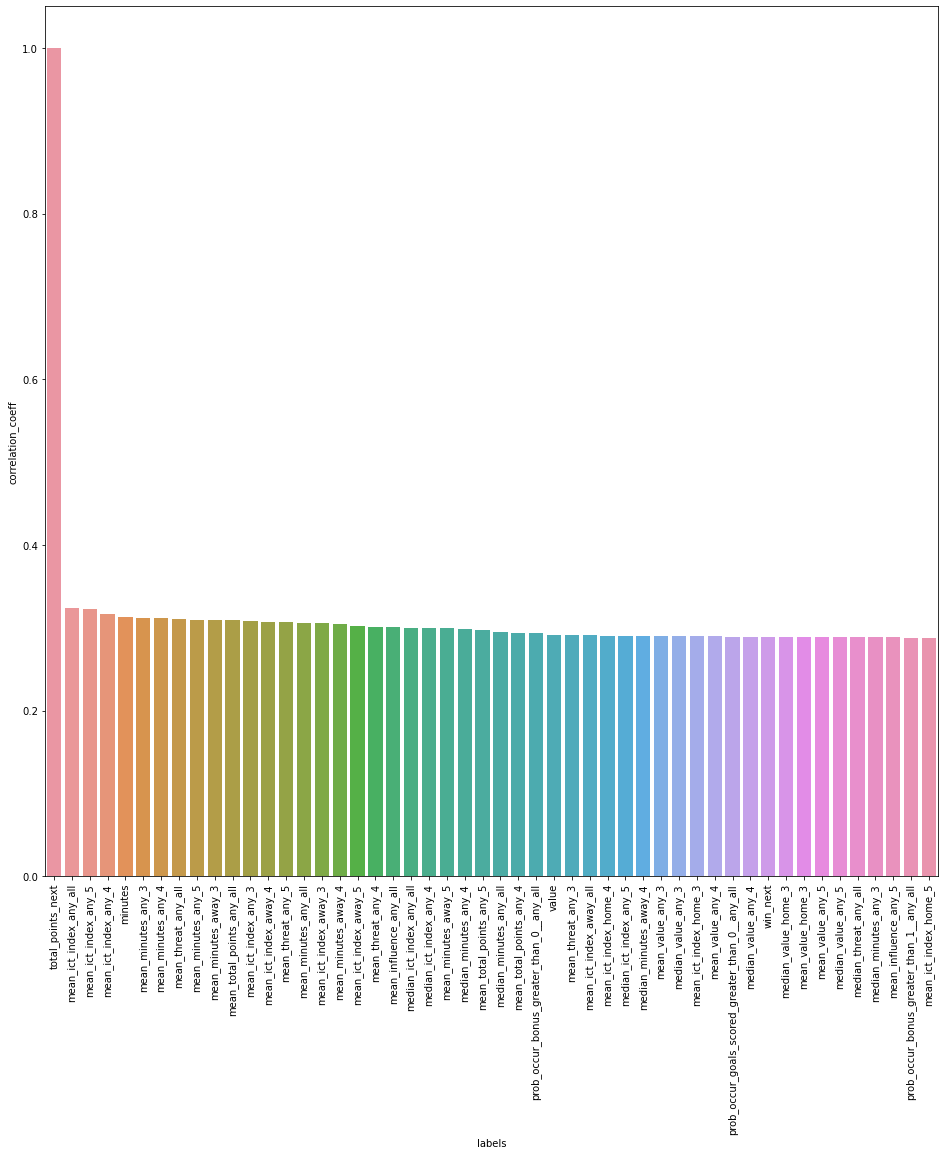

In [80]:
data_corr_cut = data_corr.iloc[:50, :]

ax = sns.barplot(x="labels", y="correlation_coeff", data=data_corr_cut)
plt.xticks(rotation=90)
plt.show()

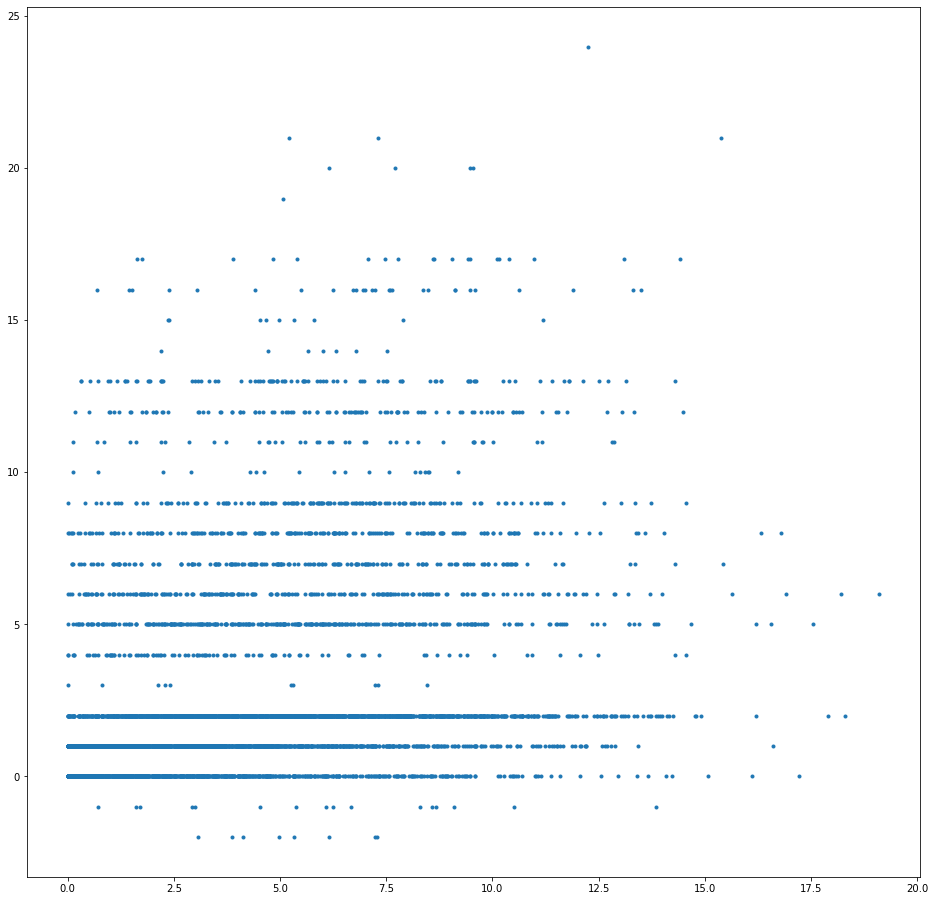

In [81]:
plt.plot(data_filt['mean_ict_index_any_5'].values, data_filt[target_column].values, '.')
plt.show()